# Dimensionality reduction notebook

This notebook explores the fundamental concepts of dimensionality reduction techniques, focusing on Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

## Overview of Dimensionality Reduction

Dimensionality reduction is a crucial technique in data analysis and machine learning, used to simplify complex, high-dimensional datasets while preserving their essential characteristics. It helps in:

1. Visualizing high-dimensional data in 2D or 3D space
2. Reducing computational complexity and storage requirements
3. Mitigating the "curse of dimensionality"
4. Identifying underlying patterns and structures in the data

We'll explore two popular dimensionality reduction methods:

- **PCA**: A linear technique that identifies the principal components (directions of maximum variance) in the data
- **t-SNE**: A non-linear technique that excels at preserving local structures and visualizing clusters in high-dimensional data

Throughout this notebook, we'll apply these techniques, visualize the results, and discuss their strengths and limitations.

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 🍀 PCA using the Iris Dataset

### The Iris Dataset
The Iris dataset is a classic dataset in machine learning and statistics. It contains:
- 150 samples from three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor)
- Four features measured in centimeters for each sample:
  1. Sepal length
  2. Sepal width
  3. Petal length
  4. Petal width

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

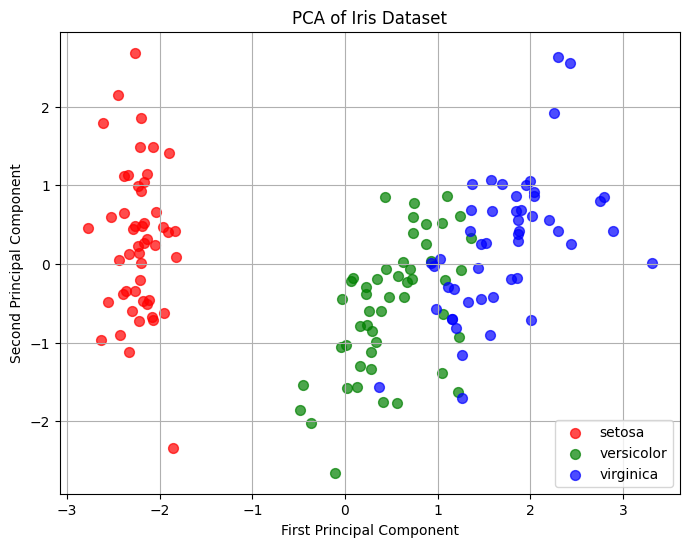

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000165


In [4]:
# Prepare the data for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Plot the results
plt.figure(figsize=(8, 6))
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = df_pca['target'] == targets.index(target)
    plt.scatter(df_pca.loc[indicesToKeep, 'PC1'], 
                df_pca.loc[indicesToKeep, 'PC2'],
                c=color, s=50, alpha=0.7)

plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(targets)
plt.grid(True)
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


### Explained Variance Ratio

The code prints two important pieces of information:

1. **Explained variance ratio**: This shows the proportion of variance explained by each principal component. It indicates how much of the original data's variability is captured by each new dimension.

2. **Total explained variance**: This is the sum of the explained variance ratios, representing the total proportion of the original variance captured by our chosen number of principal components.

### Understanding the Output

- The `explained_variance_ratio_` attribute of the PCA object gives us an array where each element represents the fraction of the total variance in the dataset explained by the corresponding principal component.
- By summing these ratios, we get the total proportion of variance explained by our selected number of components.

This information helps us assess:
1. How well our reduced-dimensional representation preserves the original data's structure.
2. Whether we've chosen an appropriate number of components for our analysis.

A high total explained variance (close to 1 or 100%) indicates that our PCA model captures most of the original data's variability, suggesting an effective dimensionality reduction.


## 🦜 t-SNE using text-based data

t-SNE is a powerful dimensionality reduction technique used for visualizing high-dimensional data. According to @Scikit-learn, it converts similarities between data points to joint probabilities and aims to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

Key features of t-SNE:
- Particularly effective for visualizing clusters or groups in data
- Non-linear dimensionality reduction, capturing complex relationships
- Preserves local structure of the data
- Widely used for visualizing high-dimensional datasets in 2D or 3D space

t-SNE is especially useful for exploring and visualizing complex datasets where linear techniques like PCA may not capture the full structure of the data.


In [5]:
# Load embeddings from JSON file
with open('../data/embeddings.json', 'r') as f:
    embeddings_data = json.load(f)

sentences = embeddings_data['sentences']
embeddings = embeddings_data['embeddings']

# Flatten the dictionary into a list of sentences with their categories
sentences_list = [(sentence, category) for category, sent_list in sentences.items() for sentence in sent_list]

# Separate sentences and categories
texts, categories = zip(*sentences_list)

print("Number of sentences:", len(texts))
print("Categories:", set(categories))
print("Embeddings shape:", len(embeddings['technical'][0]))
print(40*'*')

# Print sentences
for text in sentences_list:
    print(text)

NameError: name 'json' is not defined

In [ ]:
# Load embeddings
embeddings = np.array([emb for category in embeddings_data['embeddings'].values() for emb in category])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
tsne_results = tsne.fit_transform(embeddings)

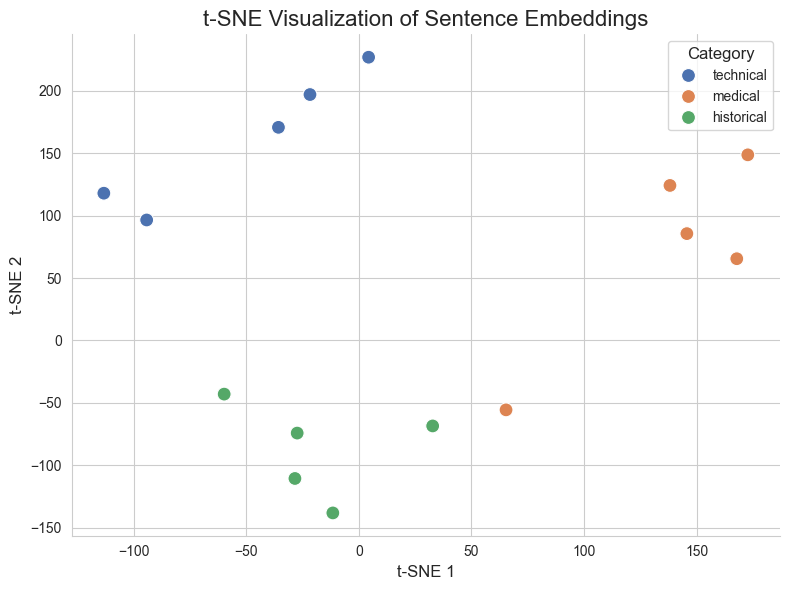

t-SNE completed. Each point represents a sentence, colored by its category.
Close clustering of points indicates similarity in the high-dimensional space.


In [6]:
# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame({
    'x': tsne_results[:, 0],
    'y': tsne_results[:, 1],
    'category': [cat for cat, sent_list in sentences.items() for _ in sent_list]
})

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the scatter plot
sns.scatterplot(data=df, x='x', y='y', hue='category', palette='deep', s=100)

plt.title('t-SNE Visualization of Sentence Embeddings', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.legend(title='Category', title_fontsize='12', fontsize='10')

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

# Print additional information
print("t-SNE completed. Each point represents a sentence, colored by its category.")
print("Close clustering of points indicates similarity in the high-dimensional space.")
